In [1]:
using BoundaryValueDiffEq, Plots, Printf, LaTeXStrings

In [2]:
L = 20
tspan = (0, L)
@inline f(t) = tanh(t)
@inline ddf(t) = -2 * tanh(t) * sech(t)^2
@inline coeff(t) = t < 1e-6 ? -2.0 : ddf(t) / f(t)
# S = 1000
k = 0.5

function tearing!(du, u, p, t)
    du[1] = u[2]
    du[2] = (k^2 + coeff(t)) * u[1]
end

# initial state vector at t=0
u0 = [1.0, 0.0]

function bca!(res, u, p)
    res[1] = u[1] - 1 # normalization : ψ(0) = 1
end

function bcb!(res, u, p)
    res[1] = u[1]
end

prob = TwoPointBVProblem(tearing!, (bca!, bcb!), u0, tspan, bcresid_prototype=(zeros(1), zeros(1)))
sol = solve(prob, MIRK6(), dt=0.5);

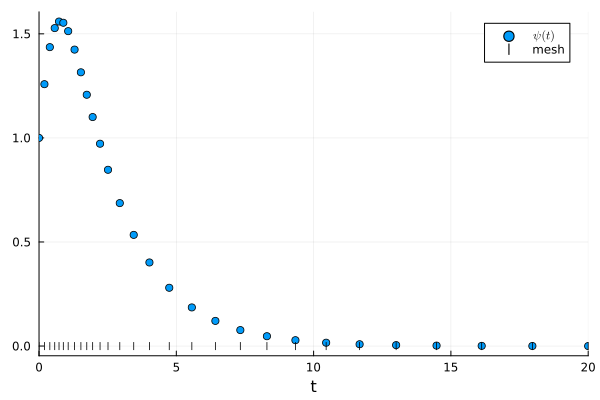

In [3]:
scatter(sol, idxs=(0, 1), label=L"ψ(t)", lw=2)
scatter!(sol.t, zeros(length(sol.t)), marker=:vline, color="black", label="mesh")